## Séries Temporais - Modelo SARIMA

Modelo $SARIMA(p,d,q)(P,D,Q)_{s}$

s: Número de períodos referentes ao ciclo sazonal.

### 1. Análise dos Dados

In [3]:
import pandas as pd

In [64]:
dados = pd.read_csv("sarima.csv")

In [65]:
dados.head()

,state,number,Month
0,Acre,0.0,1998-1
1,Acre,0.0,1999-1
2,Acre,0.0,2000-1
3,Acre,0.0,2001-1
4,Acre,0.0,2002-1


In [66]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   6454 non-null   object 
 1   number  6454 non-null   float64
 2   Month   6454 non-null   object 
dtypes: float64(1), object(2)
memory usage: 151.4+ KB


In [67]:
dados.Month = pd.to_datetime(dados.Month)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   state   6454 non-null   object        
 1   number  6454 non-null   float64       
 2   Month   6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 151.4+ KB


In [68]:
dados.set_index('Month', inplace = True)

dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6454 entries, 1998-01-01 to 2016-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   6454 non-null   object 
 1   number  6454 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.3+ KB


In [69]:
dados.sort_index(inplace = True)

dados.head(30)

,state,number
Month,,
1998-01-01,Acre,0.0
1998-01-01,Paraiba,0.0
1998-01-01,Pará,0.0
1998-01-01,Rio,0.0
1998-01-01,Tocantins,0.0
1998-01-01,Minas Gerais,0.0
1998-01-01,Sergipe,0.0
1998-01-01,Mato Grosso,0.0
1998-01-01,Rio,0.0


In [40]:
dados.isnull().sum()

state     0
number    0
dtype: int64

#### Nessa análise vou trabalhar com um estado em específico, no caso será estado do Amapa.

In [70]:
df_amapa = dados[dados.state == 'Amapa']
df_amapa.head()

,state,number
Month,,
1998-01-01,Amapa,0.0
1998-02-01,Amapa,0.0
1998-03-01,Amapa,0.0
1998-04-01,Amapa,0.0
1998-05-01,Amapa,0.0


### 2. Análise exploratória

In [71]:
import plotly.express as px

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from  statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Gráfico da série Original

<AxesSubplot:xlabel='Month'>

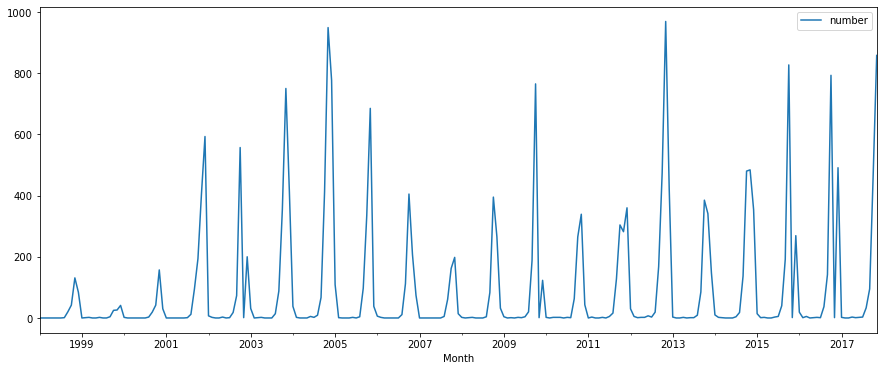

In [72]:
df_amapa.plot(figsize = (15,6))

Análise da componente sazonal

Forma de confirmar que existe uma componente sazonal é fazendo agrupamento por mês.

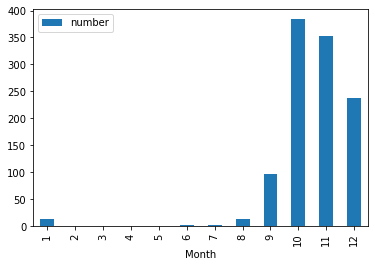

In [73]:
sazonalidade = df_amapa.groupby(df_amapa.index.month).mean().plot(kind ='bar')



Observando o gráfico acima, é possível verificar componente sazonal.

#### Análise da FAC e FACP

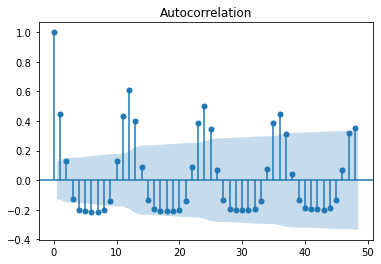

In [74]:
plot_acf(df_amapa.number, lags= 48)
plt.show()

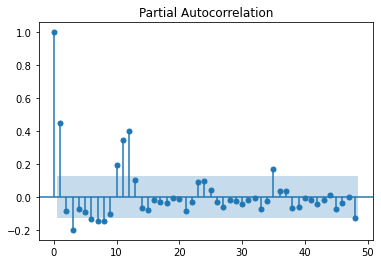

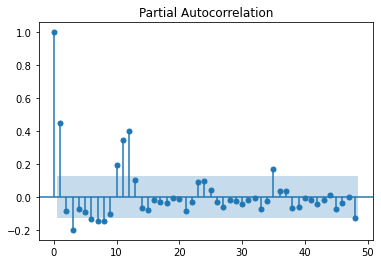

In [94]:
plot_pacf(df_amapa.number, lags= 48)
#plt.show()

IMPORTANTE

Link importante: https://www.statsmodels.org/stable/tsa.html


statsmodels.tsa 

stattools.pacf(df_amapa[, nlags, method, alpha])

#### Verificar se o componente sazonal é estacionário.

Levando em consideração que o período sazonal é de 12 em 12 meses, anual, então podemos enxergar a série para cada mês.


<AxesSubplot:xlabel='Month'>

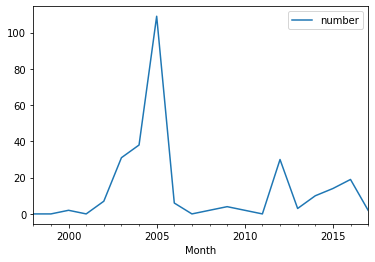

In [76]:
df_amapa[df_amapa.index.month == 1].plot()

Ao plotar o gráfico para o mês de Janeiro, a série aparentemente não tem comportamente estacionário, pois a vairância não é constante.

Já sabemos que será necessário aplicar D = 1.

Fazendo a mesma análise, mas agora para os demais meses.

Month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

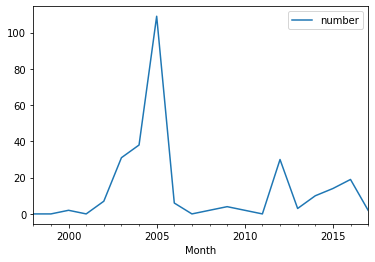

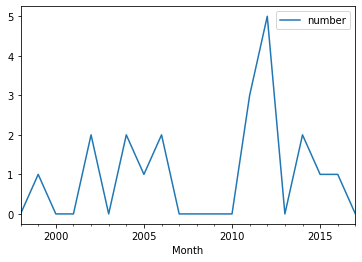

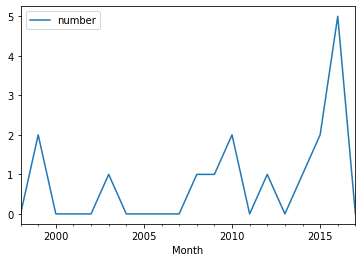

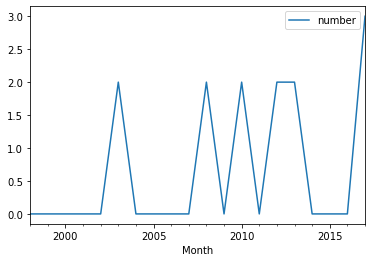

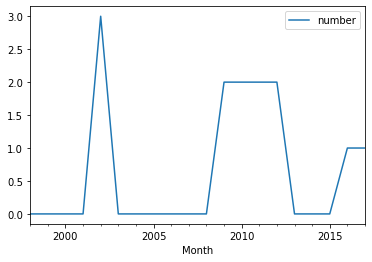

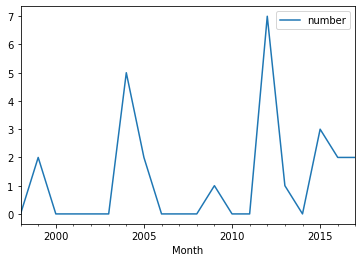

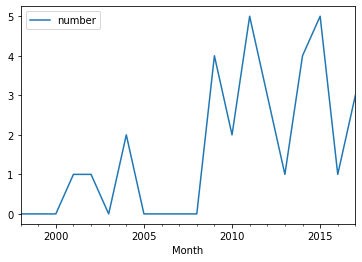

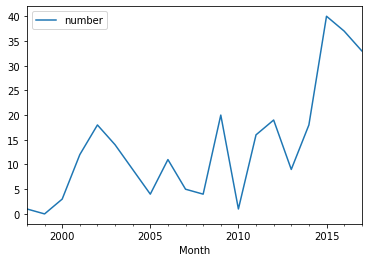

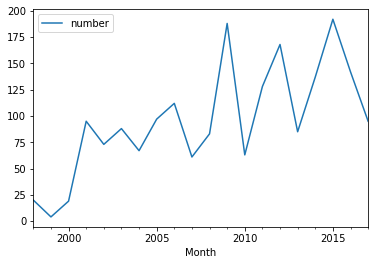

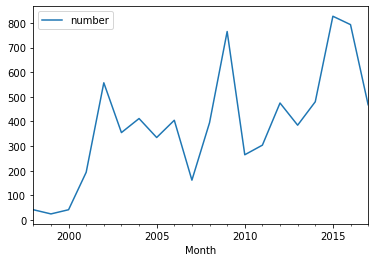

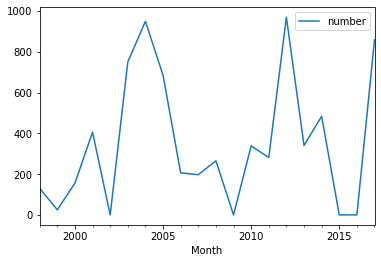

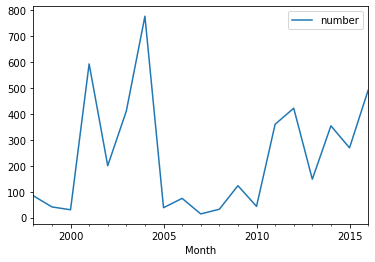

In [77]:
df_amapa.groupby(df_amapa.index.month).plot()

### 3. Separação em Treino e Teste

In [ ]:
int(len(dados))

### 4. Modelo SARIMA

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [80]:
model_sarima = SARIMAX(df_amapa.number, freq='MS', order=(2,1,2), seasonal_order = (3,1,2, 12)).fit()

model_sarima.summary()

C:\Users\usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             number   No. Observations:                  239
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1426.976
Date:                            Wed, 17 Feb 2021   AIC                           2873.952
Time:                                    18:53:17   BIC                           2908.158
Sample:                                01-01-1998   HQIC                          2887.756
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8211      0.773     -1.063      0.288      -2.335       0.693
ar.L2          0.1618      0.175      0.927      0.354      -0.180       0.504
ma.L1         -0.0109      2.697     -0.004      0.997      -5.297       5.275
ma.L2         -0.9886      2.545     -0.388      0.698      -5.976       3.999
ar.S.L12      -0.6193      0.070     -8.791      0.000      -0.757      -0.481
ar.S.L24       0.2324      0.091      2.542      0.011       0.053       0.412
ar.S.L36       0.1288      0.054      2.366      0.018       0.022       0.235
ma.S.L12       0.0008     14.549   5.76e-05      1.000     -28.515      28.517
ma.S.L24      -0.9992      2.461     -0.406      0.685      -5.824       3.825
sigma2      1.425e+04      0.001   1.29e+07      0.000    1.42e+04    1.42e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               846.36
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.96
Prob(H) (two-sided):                  0.19   Kurtosis:                        12.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+24. Standard errors may be unstable.
"""

freq = 'MS' refere-se que a frequencia é mensal, onde o primeiro dia do mês que é considerado.

In [81]:
(model_sarima.resid ** 2).mean()

16353.825037220367